In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

%matplotlib inline

In [63]:
kpi = '88cf3a776ba00e7c'

In [64]:
df = pd.read_csv('donut/'+kpi+'_predictions.csv',index_col='timestamp')
df = df.drop(['Unnamed: 0'], axis=1)

# Training df (contains labels)
df_train = pd.read_csv('../train/KPI/train_'+kpi+'.csv',index_col='timestamp')

prob = np.load('../PICKLE/donut/models/'+kpi+'/test_matrix_initial_size.npy')
df['prob'] = prob

In [65]:
df_mod = df.sort_values(by=['prob'],ascending=False).tail(50)

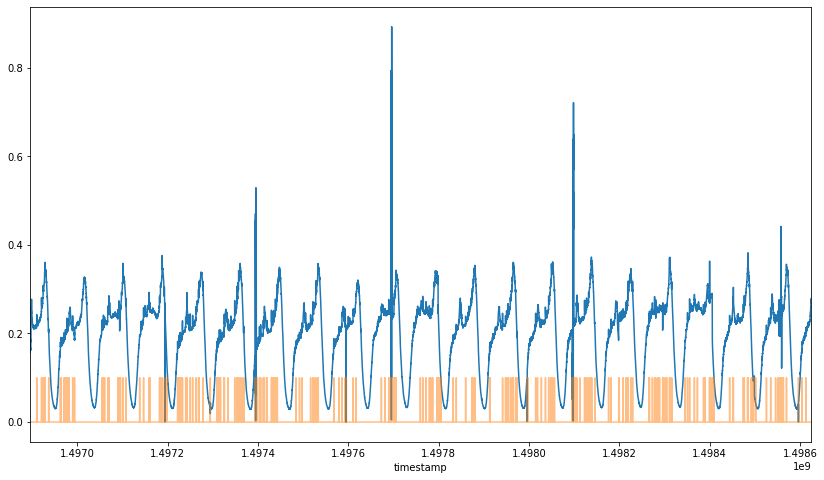

In [66]:
df['value'].head(20*1440).plot(kind='line',figsize=(14,8))
plt.plot(df['predictions'].head(40*1440)*0.1,alpha=.5)

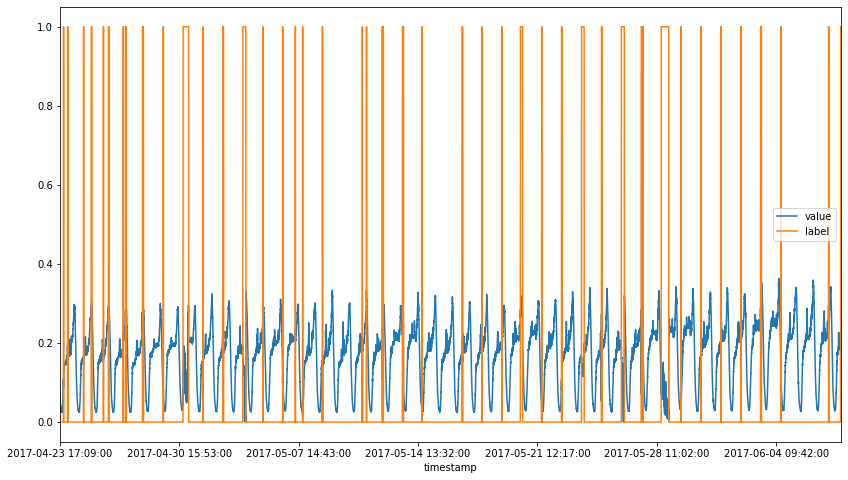

In [67]:
df_train.plot(kind='line',figsize=(14,8))

In [50]:
df_train.groupby(df_train.label).count()

,value,KPI ID
label,,
0,119272,119272
1,9581,9581


In [51]:
df.groupby(df.predictions).count()

,value,KPI ID,prob
predictions,,,
0,103779,103779,103779
1,8337,8337,8337


In [52]:
df.groupby(df.predictions).count().value.values[1] / df.groupby(df.predictions).count().value.values[0]

0.08033417165322464

In [56]:
df

,value,KPI ID,predictions,prob
timestamp,,,,
1501475700,1414.812500,1c35dbf57f55f5e4,0,-0.236655
1501475760,1343.812500,1c35dbf57f55f5e4,0,-0.236655
1501475820,1367.437500,1c35dbf57f55f5e4,0,-0.236655
1501475880,1368.750000,1c35dbf57f55f5e4,0,-0.236655
1501475940,1397.875000,1c35dbf57f55f5e4,0,-0.236655
...,...,...,...,...
1509383100,1477.647095,1c35dbf57f55f5e4,1,-2.635274
1509383160,1434.470581,1c35dbf57f55f5e4,0,-1.918489
1509383220,1463.705933,1c35dbf57f55f5e4,0,-2.252835
